In [2]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import numpy as np
from IPython.display import Image,display
%matplotlib nbagg

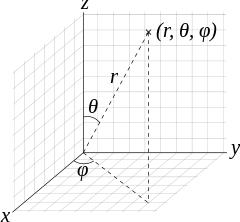

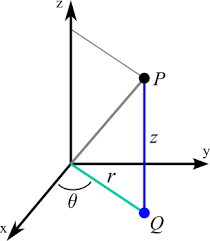

In [7]:
display(Image("spherical.png"))
display(Image("cylindrical.png"))

def np2cart(p):
    return {'x':p[0],'y':p[1],'z':p[2]}
def np2sphe(p):
    return {'r':p[0],'theta':p[1],'phi':p[2]}
def cart2np(p):
    return [p['x'],p['y'],p['z']]
def sphe2np(p):
    return [p['r'],p['theta'],p['phi']]
def cyl2np(p):
    return [p['r'],p['z'],p['phi']]
def np2cyl(p):
    return {'r':p[0],'z':p[1],'phi':p[2]}


def cart2sphe(p):
    #x=p[0];y=p[1];z=p[2]
    q={}
    q['r'] = np.sqrt(np.square(p['x'])+np.square(p['y'])+np.square(p['z']))
    q['theta'] = np.arccos(p['z']/q['r'])
    q['phi'] = np.arctan2(p['y'],p['x']) 
    return q

def sphe2cart(p):
    q={}
    q['z'] = np.cos(p['theta'])*p['r']
    q['x'] = np.sin(p['theta'])*p['r']*np.cos(p['phi'])
    q['y'] = np.sin(p['theta'])*p['r']*np.sin(p['phi'])
    return q

def cart2cyl(p):
    #x=p[0];y=p[1];z=p[2]
    q={}
    q['r'] = np.sqrt(np.square(p['x'])+np.square(p['y']))
    q['z'] = p['z']
    q['phi'] = np.arctan2(p['y'],p['x']) 
    return q

def cyl2cart(p):
    q={}
    q['z'] = p['z']
    q['x'] = p['r']*np.cos(p['phi'])
    q['y'] = p['r']*np.sin(p['phi'])
    return q


def rot_cyl(p_array,phi):
    r = np.zeros(p_array.shape)
    for i in range(p_array.shape[0]):
        r[i,:] = cyl2np(cart2cyl(np2cart(p_array[i,:])))
        r[i,2] += phi
        r[i,:] = cart2np(cyl2cart(np2cyl(r[i,:])))
    return r



In [8]:
rot_cyl(np.array([[1,1,1],[-1,-1,1],[2,2,2]]),np.pi)

array([[-1., -1.,  1.],
       [ 1.,  1.,  1.],
       [-2., -2.,  2.]])

In [12]:
cyl=cart2cyl(np2cart([1,1,1]))
print cyl
cartesian = cyl2cart(cyl)
print cartesian

{'phi': 0.78539816339744828, 'r': 1.4142135623730951, 'z': 1}
{'y': 1.0, 'x': 1.0000000000000002, 'z': 1}


In [18]:
def SiPM(position,phi,ax):
    
    s = np.array([1,3,3],dtype=float)
    p = np.array([[s[0]/2,s[1]/2,s[2]/2],[s[0]/2,s[1]/2,-s[2]/2],
                  [-s[0]/2,s[1]/2,s[2]/2],[-s[0]/2,s[1]/2,-s[2]/2],
                  [s[0]/2,-s[1]/2,s[2]/2],[s[0]/2,-s[1]/2,-s[2]/2],
                  [-s[0]/2,-s[1]/2,s[2]/2],[-s[0]/2,-s[1]/2,-s[2]/2]])
   
    p=rot_cyl(p,phi)
    
    position = np.array([position for i in range(p.shape[0])])
    p = p + position
    
    verts = [ [p[0],p[1],p[3],p[2]],
          [p[0],p[2],p[6],p[4]],
          [p[1],p[3],p[7],p[5]],
          [p[1],p[0],p[4],p[5]],
          [p[6],p[4],p[5],p[7]],
          [p[6],p[2],p[3],p[7]]
        ]
    
    ax.scatter3D(p[:, 0], p[:, 1], p[:, 2],s=1)
    # plot sides
    ax.add_collection3d(Poly3DCollection(verts, 
                        facecolors='cyan', linewidths=0.5, edgecolors='red', alpha=.25))
    
    
    
    
    return p

<IPython.core.display.Javascript object>


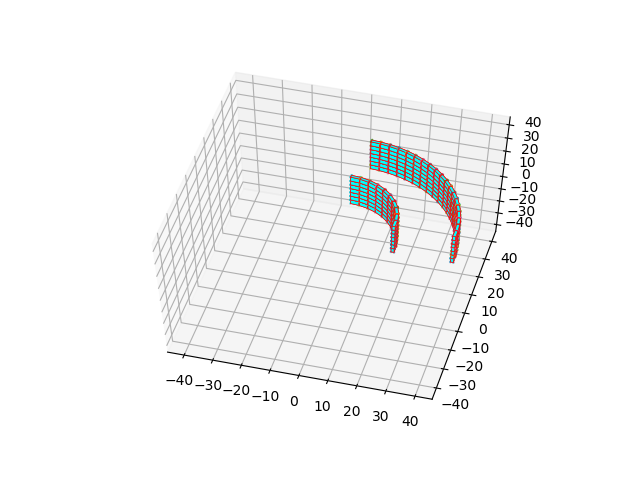

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

radius=20.0
sensors=38.0


for j in range(0,20,3):
    for i in range(int(sensors)):
        if i*2*np.pi/sensors < np.pi/2.0:
            SiPM(cart2np(cyl2cart(np2cyl([radius,j,i*2*np.pi/sensors]))),i*2*np.pi/sensors,ax)

radius=40.0
sensors=76.0          
            
for j in range(0,20,3):
    for i in range(int(sensors)):
        if i*2*np.pi/sensors < np.pi/2.0:
            SiPM(cart2np(cyl2cart(np2cyl([radius,j,i*2*np.pi/sensors]))),i*2*np.pi/sensors,ax)

#ax.axis('equal')
ax.auto_scale_xyz([-radius, radius], [-radius, radius], [-radius,radius])
plt.show()